## Handling missing Value 


* **Delete the record missing value**
* **Statistical methods Mean, Meadian, or Mode**
* **Create seprate model that handle missing value**
* **Forward / Backward fillng**


In [3]:
import pandas as pd
import numpy as np

**Method 1 applied** :- *remove missing value row*

In [4]:
dict = {"f1":[-17,-21,26,35,45],"f2":[5,25,np.nan,66,54],"f3":[105,130,np.nan,168,199]}

In [5]:
df1 = pd.DataFrame(data=dict)

In [6]:
df1

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
2,26,NaN,NaN
3,35,66.0,168.0
4,45,54.0,199.0


In [7]:
df1.isnull().sum()

f1    0
f2    1
f3    1
dtype: int64

In [8]:
# In a row "2" most of the values are missing.So, these types if missing values we can remove 
# but only when we have huge data set

In [9]:
df1.dropna(axis=0)

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
3,35,66.0,168.0
4,45,54.0,199.0


**Method 2** :- *Statistical Method -Mode, Median , Mean*

In [10]:
df1['f3'].fillna(value = df1.f3.mode())

0    105.0
1    130.0
2    168.0
3    168.0
4    199.0
Name: f3, dtype: float64

In [11]:
df1['f3'].fillna(value = df1.f3.median())

0    105.0
1    130.0
2    149.0
3    168.0
4    199.0
Name: f3, dtype: float64

In [12]:
df1['f3'].fillna(value = df1.f3.mean(),inplace=True)

In [13]:
df1 # filled with mean

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
2,26,NaN,150.5
3,35,66.0,168.0
4,45,54.0,199.0


**Method 3** :- *Machine learning model - Linear Regression*

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
X = df1[["f1","f3"]]

In [17]:
X

,f1,f3
0,-17,105.0
1,-21,130.0
2,26,150.5
3,35,168.0
4,45,199.0


In [18]:
y = df1.f2

In [19]:
y

0     5.0
1    25.0
2     NaN
3    66.0
4    54.0
Name: f2, dtype: float64

In [20]:
X_train = X.drop(index=2)

In [21]:
X_train

,f1,f3
0,-17,105.0
1,-21,130.0
3,35,168.0
4,45,199.0


In [22]:
y_train = y.drop(index = 2)

In [23]:
y_train

0     5.0
1    25.0
3    66.0
4    54.0
Name: f2, dtype: float64

In [24]:
X_test = X.iloc[2:3,:]

In [25]:
X_test

,f1,f3
2,26,150.5


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
model.predict(X_test) # so we can fill Null value with this pridicted value

array([44.60766642])

In [28]:
df1.fillna(np.round(model.predict(X_test)[0],decimals=0))

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
2,26,45.0,150.5
3,35,66.0,168.0
4,45,54.0,199.0


**Method 4** :- *forward fill/backward fill*

In [29]:
df1

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
2,26,NaN,150.5
3,35,66.0,168.0
4,45,54.0,199.0


In [30]:
df1.ffill()

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
2,26,25.0,150.5
3,35,66.0,168.0
4,45,54.0,199.0


In [31]:
df1.bfill()

,f1,f2,f3
0,-17,5.0,105.0
1,-21,25.0,130.0
2,26,66.0,150.5
3,35,66.0,168.0
4,45,54.0,199.0


In [71]:
df = pd.read_csv(r'D:\\INEURONE\\DATASET\\Titanic\\train.csv')

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
(df.isnull().sum()/len(df))*100  # these are the percentage off missing value

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [76]:
df.shape

(891, 12)

<AxesSubplot:>

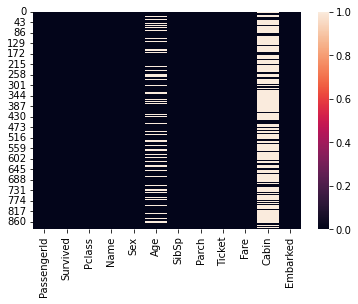

In [107]:
sns.heatmap(df.isnull())

*we can see age and cabin has missing values. In which Age missing values are low , So we can replace it wiith some standard method . But*
*Cabin column has so many missing values , so there is no use of that column. therefore we can drop it*

In [86]:
import seaborn as sns
import matplotlib as plt
import  warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Survived', ylabel='count'>

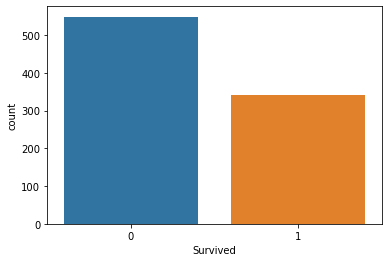

In [111]:
sns.countplot(x= df.Survived)

* **not survived people are more**

<AxesSubplot:xlabel='Survived', ylabel='count'>

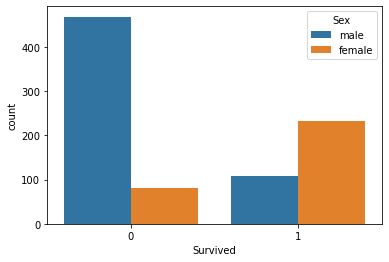

In [113]:
sns.countplot(x= df.Survived,hue= df.Sex)

* **this shows that most of the female got survived as compare to male**

<AxesSubplot:xlabel='Survived', ylabel='count'>

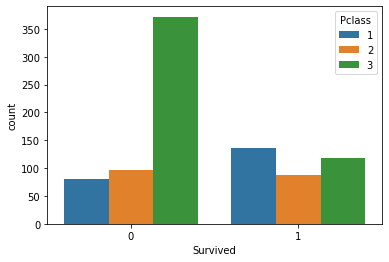

In [114]:
sns.countplot(x= df.Survived,hue= df.Pclass)

* **people from 3rd class not survived as compare to 2nd and 1st**

<AxesSubplot:xlabel='Age'>

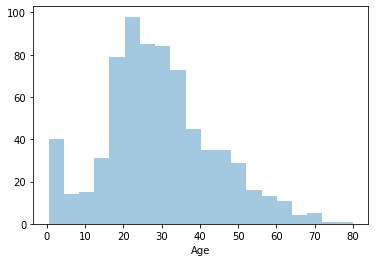

In [119]:
sns.distplot(df.Age,kde=False)

* *most of the people on ship is of age between 15-45*

<AxesSubplot:xlabel='Survived', ylabel='Age'>

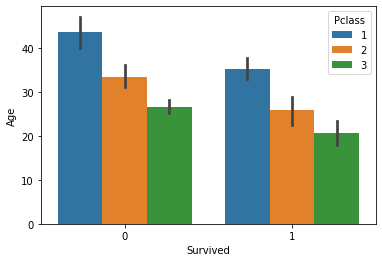

In [101]:
sns.barplot(df['Survived'],df['Age'],hue = df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

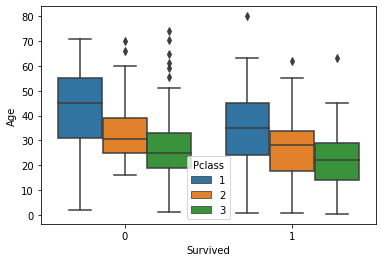

In [122]:
sns.boxplot(df.Survived,df.Age,hue = df.Pclass)

In [186]:
df[df['Age'].isnull()].groupby(['Survived','Pclass','Sex'])[['Sex']].count()

Sex
Survived Pclass Sex        
0        1      male     16
         2      male      7
         3      female   17
                male     85
1        1      female    9
                male      5
         2      female    2
                male      2
         3      female   25
                male      9

In [302]:
df1 = df.groupby(['Survived','Pclass','Sex'])[['Age']].quantile(0.5) # instead of quantile we can use mean/mode/median also

In [303]:
df1

Age
Survived Pclass Sex         
0        1      female  25.0
                male    45.5
         2      female  32.5
                male    30.5
         3      female  22.0
                male    25.0
1        1      female  35.0
                male    36.0
         2      female  28.0
                male     3.0
         3      female  19.0
                male    25.0

* *here in above table we have found 50% percetile age in each category by grouping "survived,Pclass,sex" column*
* **So Age missing value can be filled according to above table**
   * **For Example:-** *if Survived = 0 , Pclass = 1  and Sex = 'female' then* **Age** *Null value will be filled with* **= 25.0**
   

In [294]:
df_copy = df.copy()

In [298]:
for index,survived,Pclass,Sex in list(df[df['Age'].isnull()][['Survived','Pclass','Sex']].itertuples(name=None)):
    
    df_copy['Age'].loc[index] = (df1.loc[survived,Pclass,Sex]).values[0]
    

<AxesSubplot:xlabel='Age', ylabel='Density'>

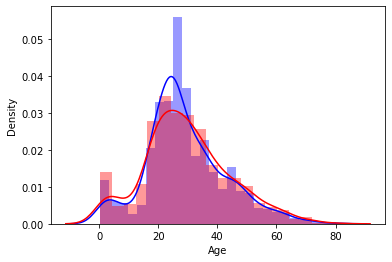

In [315]:
sns.distplot(df_copy['Age'],color = 'Blue')
sns.distplot(df['Age'],color = 'Red') 

*blue line represent filled NAN value's dataframe and redline is old one.*<br>
*increase in normally distribution*

<AxesSubplot:>

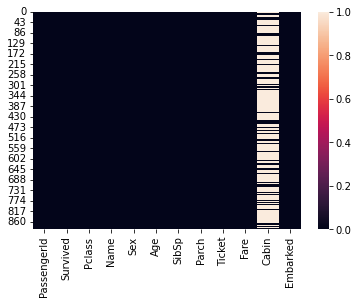

In [307]:
sns.heatmap(df_copy.isnull())

* *No missing values in Age column*
* **Cabin** *contain 77% missing value there for we can* **delete column**

In [311]:
df_copy.drop(columns = 'Cabin',inplace = True)